##importing Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score
from sklearn.model_selection import cross_val_score, RandomizedSearchCV, KFold, StratifiedKFold
# Classifier models
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier, XGBRFClassifier
from lightgbm import LGBMClassifier
# for feature scaling
from sklearn.preprocessing import StandardScaler

 ## LOADING THE DATASET



In [2]:
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00471/Data_for_UCI_named.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   tau1    10000 non-null  float64
 1   tau2    10000 non-null  float64
 2   tau3    10000 non-null  float64
 3   tau4    10000 non-null  float64
 4   p1      10000 non-null  float64
 5   p2      10000 non-null  float64
 6   p3      10000 non-null  float64
 7   p4      10000 non-null  float64
 8   g1      10000 non-null  float64
 9   g2      10000 non-null  float64
 10  g3      10000 non-null  float64
 11  g4      10000 non-null  float64
 12  stab    10000 non-null  float64
 13  stabf   10000 non-null  object 
dtypes: float64(13), object(1)
memory usage: 1.1+ MB


# **Wow No missing value**

In [4]:
data.head(10).T

,0,1,2,3,4,5,6,7,8,9
tau1,2.95906,9.3041,8.97171,0.716415,3.13411,6.99921,6.71017,6.95351,4.68985,9.8415
tau2,3.07989,4.90252,8.84843,7.6696,7.60877,9.10925,3.7652,1.37913,4.00775,1.41382
tau3,8.38103,3.04754,3.04648,4.48664,4.94376,3.78407,6.92931,5.7194,1.47857,9.76986
tau4,9.78075,1.36936,1.21452,2.34056,9.85757,4.26779,8.81856,7.87031,3.73379,7.64162
p1,3.76308,5.06781,3.40516,3.96379,3.52581,4.42967,2.39742,3.2245,4.0413,4.7276
p2,-0.782604,-1.94006,-1.20746,-1.02747,-1.12553,-1.85714,-0.61459,-0.748998,-1.41034,-1.99136
p3,-1.25739,-1.87274,-1.27721,-1.93894,-1.84597,-0.670397,-1.20883,-1.18652,-1.2382,-0.857637
p4,-1.72309,-1.25501,-0.920492,-0.997374,-0.554305,-1.90213,-0.574004,-1.28898,-1.39275,-1.87859
g1,0.650456,0.413441,0.163041,0.446209,0.79711,0.261793,0.17789,0.371385,0.269708,0.376356
g2,0.859578,0.862414,0.766689,0.976744,0.45545,0.0779297,0.397977,0.633204,0.250364,0.544415


In [5]:
data.isna().sum()

tau1     0
tau2     0
tau3     0
tau4     0
p1       0
p2       0
p3       0
p4       0
g1       0
g2       0
g3       0
g4       0
stab     0
stabf    0
dtype: int64

We are required to drop the "stab" column

In [6]:
data_df = data.drop(columns='stab')

In [7]:
data_df.head(5)

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,unstable


In [8]:
data_df.stabf.value_counts()

unstable    6380
stable      3620
Name: stabf, dtype: int64

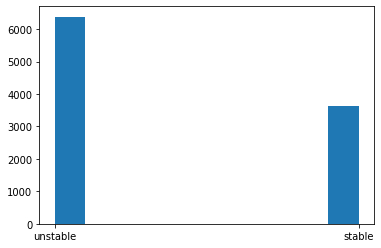

In [9]:
plt.hist(data_df['stabf'])
plt.show()

From what we can see from the data, there is no need for encoding, so we do data splitting next!

In [10]:
# form the target and feature varaibles
X = data_df.drop(columns =['stabf'])
y = data_df.stabf

In [11]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
y_train.value_counts()

unstable    5092
stable      2908
Name: stabf, dtype: int64

Performing Scaling

In [12]:
scaler= StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)

x_test_scaled = scaler.transform(x_test)

### Models And their Respective evaluations

In [13]:
rndC = RandomForestClassifier(random_state=1)
rndC.fit(x_train_scaled, y_train)
rf_predictions = rndC.predict(x_test_scaled)

In [14]:
rf_predictions

array(['unstable', 'unstable', 'stable', ..., 'stable', 'stable',
       'unstable'], dtype=object)

In [15]:
print(classification_report(y_test, rf_predictions, digits=4))

              precision    recall  f1-score   support

      stable     0.9191    0.8778    0.8980       712
    unstable     0.9341    0.9573    0.9456      1288

    accuracy                         0.9290      2000
   macro avg     0.9266    0.9176    0.9218      2000
weighted avg     0.9288    0.9290    0.9286      2000



In [16]:
accuracy_score(y_test, rf_predictions)

0.929

In [17]:
print(confusion_matrix(y_true=y_test, y_pred=rf_predictions, labels=['stable', 'unstable']))

[[ 625   87]
 [  55 1233]]


**Extra Tree Classifier**

In [23]:
X_tree = ExtraTreesClassifier(random_state=1)
X_tree.fit(x_train_scaled, y_train)
X_tree_pred = X_tree.predict(x_test_scaled)

## **An ExtraTreesClassifier with parameters from hyper-tuning**

In [47]:
X_tree_2 = ExtraTreesClassifier(n_estimators = 1000, max_features = None, min_samples_leaf = 8, min_samples_split = 2, random_state=1)
X_tree_2.fit(x_train_scaled, y_train)
X_tree_pred2 = X_tree_2.predict(x_test_scaled)

In [48]:
print(classification_report(y_test, X_tree_pred2, digits=4))

              precision    recall  f1-score   support

      stable     0.9211    0.8694    0.8945       712
    unstable     0.9300    0.9589    0.9442      1288

    accuracy                         0.9270      2000
   macro avg     0.9256    0.9141    0.9193      2000
weighted avg     0.9268    0.9270    0.9265      2000



In [26]:
print(classification_report(y_test, X_tree_pred, digits=4))

              precision    recall  f1-score   support

      stable     0.9410    0.8511    0.8938       712
    unstable     0.9218    0.9705    0.9455      1288

    accuracy                         0.9280      2000
   macro avg     0.9314    0.9108    0.9197      2000
weighted avg     0.9287    0.9280    0.9271      2000



In [25]:
accuracy_score(y_test, X_tree_pred)

0.928

We can observe the accuracies of the classifier of the one with tuning and the other without tuning from the Above

In [27]:
print(confusion_matrix(y_true=y_test, y_pred=X_tree_pred, labels=['stable', 'unstable']))

[[ 606  106]
 [  38 1250]]


XGB Classifier Comparison

In [18]:
xgb = XGBClassifier(max_depth=3,learning_rate=0.1, random_state=1)
xgb.fit(x_train_scaled, y_train)
xgb_pred = xgb.predict(x_test_scaled)

In [19]:
accuracy_score(y_test, xgb_pred)

0.9195

In [20]:
print(classification_report(y_test, xgb_pred, digits=4))

              precision    recall  f1-score   support

      stable     0.9206    0.8469    0.8822       712
    unstable     0.9190    0.9596    0.9389      1288

    accuracy                         0.9195      2000
   macro avg     0.9198    0.9033    0.9105      2000
weighted avg     0.9195    0.9195    0.9187      2000



In [22]:
print(confusion_matrix(y_true=y_test, y_pred=xgb_pred, labels=['stable', 'unstable']))

[[ 603  109]
 [  52 1236]]


In [40]:
xgb1 = XGBRFClassifier(max_depth=3,learning_rate=0.1, random_state=1)
xgb1.fit(x_train_scaled, y_train)
xgb_pred1 = xgb.predict(x_test_scaled)

In [27]:
accuracy_score(y_test, xgb_pred1)

0.9195

### LightGbM Classifier

In [28]:
lgbm = LGBMClassifier(random_state=1)
lgbm.fit(x_train_scaled, y_train)
lgbm_pred = lgbm.predict(x_test_scaled)

In [29]:
print(confusion_matrix(y_true=y_test, y_pred=xgb_pred, labels=['stable', 'unstable']))

[[ 603  109]
 [  52 1236]]


In [30]:
print(classification_report(y_test, lgbm_pred, digits=4))

              precision    recall  f1-score   support

      stable     0.9297    0.8919    0.9104       712
    unstable     0.9415    0.9627    0.9520      1288

    accuracy                         0.9375      2000
   macro avg     0.9356    0.9273    0.9312      2000
weighted avg     0.9373    0.9375    0.9372      2000



**RandomsizedCV to improve the EXtra Tree Classifier**

In [31]:
n_estimators = [50, 100, 300, 500, 1000]
min_samples_split = [2, 3, 5, 7, 9]
min_samples_leaf = [1, 2, 4, 6, 8]
max_features = ['auto', 'sqrt', 'log2', None]

hyperparameter_grid = {'n_estimators': n_estimators, 'min_samples_leaf': min_samples_leaf,
                       'min_samples_split': min_samples_split, 'max_features': max_features}

In [44]:
Random_Search = RandomizedSearchCV(X_tree, hyperparameter_grid, cv=5, n_iter=10, scoring = 'accuracy', n_jobs = -1, verbose = 1, random_state=1)
Random_Search.fit(x_train_scaled, y_train)
Rn_search_pred = Random_Search.predict(x_test_scaled)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  1.5min finished


In [45]:
Random_Search.best_params_

{'max_features': None,
 'min_samples_leaf': 8,
 'min_samples_split': 2,
 'n_estimators': 1000}

In [33]:
print(confusion_matrix(y_true=y_test, y_pred=Rn_search_pred, labels=['stable', 'unstable']))

[[ 619   93]
 [  53 1235]]


In [35]:
print(classification_report(y_test, Rn_search_pred, digits=4))

              precision    recall  f1-score   support

      stable     0.9211    0.8694    0.8945       712
    unstable     0.9300    0.9589    0.9442      1288

    accuracy                         0.9270      2000
   macro avg     0.9256    0.9141    0.9193      2000
weighted avg     0.9268    0.9270    0.9265      2000



## We can write an utility function to compute Cross validation scores

In [37]:
def cross_valid(model, X_train = x_train_scaled, X_test = x_test_scaled, y_train=y_train ):
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='f1_macro')
    return scores.mean()*100

In [41]:
print("Cross val score of RandomClassifier \n", cross_valid(rndC))
print("Cross val score of ExtraTreesClassifier \n", cross_valid(X_tree))
print("Cross val score of XGBClassifier \n", cross_valid(xgb))
print("Cross val score of XGBRFClassifier \n", cross_valid(xgb1))
print("Cross val score of LGBMClassifier \n", cross_valid(lgbm))
print("Cross val score of RandomizedSearchCV \n", cross_valid(Random_Search))

Cross val score of RandomClassifier 
 91.12309265936217
Cross val score of ExtraTreesClassifier 
 91.46867832800964
Cross val score of XGBClassifier 
 91.3159560444606
Cross val score of XGBRFClassifier 
 75.84575291609639
Cross val score of LGBMClassifier 
 93.30569051679414
Cross val score of RandomizedSearchCV 
 91.64456884977612


In [49]:
feature_importance = X_tree.feature_importances_

In [51]:
feature_importance

array([0.11739736, 0.11844468, 0.11316851, 0.11546569, 0.03950675,
       0.04037132, 0.04070628, 0.04057864, 0.08978291, 0.09367636,
       0.09688268, 0.09401882])

In [54]:
feature_import

,0
0,0.117397
1,0.118445
2,0.113169
3,0.115466
4,0.039507
5,0.040371
6,0.040706
7,0.040579
8,0.089783
9,0.093676


**VISUALISING THE FEATURE IMPORTANCE TO TRACK THE MOST AND LEAST ONE**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


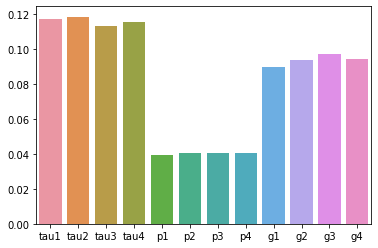

In [57]:
sns.barplot(x_train.columns, feature_importance)